In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

In [ ]:
!git clone https://github.com/uhh-lt/TextGraphs17-shared-task.git

Cloning into 'TextGraphs17-shared-task'...
remote: Enumerating objects: 484, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 484 (delta 3), reused 2 (delta 2), pack-reused 480
Receiving objects: 100% (484/484), 36.63 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
data_train = pd.read_csv('TextGraphs17-shared-task/data/tsv/train.tsv', sep='\t')
data_test = pd.read_csv('TextGraphs17-shared-task/data/tsv/test.tsv', sep='\t')

data_train.head()

,sample_id,question,questionEntity,answerEntity,groundTruthAnswerEntity,answerEntityId,questionEntityId,groundTruthAnswerEntityId,correct,graph
0,0,Whst is the name of the head of state and high...,Iran,Ruhollah Khomeini's return to Iran,Office of the Supreme Leader of Iran,Q7293530,Q794,Q16045000,False,"{'nodes': [{'type': 'QUESTIONS_ENTITY', 'name_..."
1,1,Whst is the name of the head of state and high...,Iran,Ruhollah Khomeini's letter to Mikhail Gorbachev,Office of the Supreme Leader of Iran,Q5952984,Q794,Q16045000,False,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q417..."
2,2,Whst is the name of the head of state and high...,Iran,Ruhollah Khomeini,Office of the Supreme Leader of Iran,Q38823,Q794,Q16045000,False,"{'nodes': [{'type': 'QUESTIONS_ENTITY', 'name_..."
3,3,Whst is the name of the head of state and high...,Iran,Office of the Supreme Leader of Iran,Office of the Supreme Leader of Iran,Q16045000,Q794,Q16045000,True,"{'nodes': [{'type': 'QUESTIONS_ENTITY', 'name_..."
4,4,Whst is the name of the head of state and high...,Iran,Mohammad Reza Pahlavi and Soraya,Office of the Supreme Leader of Iran,Q63195813,Q794,Q16045000,False,"{'nodes': [{'type': 'QUESTIONS_ENTITY', 'name_..."


In [ ]:
data_test.head(20)

,sample_id,question,questionEntity,answerEntity,questionEntityId,answerEntityId,graph
0,0,"After publishing A Time to Kill, which book di...",A Time to Kill,A Clash of Kings,Q1213715,Q300370,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
1,1,"After publishing A Time to Kill, which book di...",A Time to Kill,A Feast for Crows,Q1213715,Q1764445,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
2,2,"After publishing A Time to Kill, which book di...",A Time to Kill,Fear and Loathing in Las Vegas,Q1213715,Q772435,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
3,3,"After publishing A Time to Kill, which book di...",A Time to Kill,In Cold Blood,Q1213715,Q1142887,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
4,4,"After publishing A Time to Kill, which book di...",A Time to Kill,Into the Woods,Q1213715,Q1118244,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
5,5,"After publishing A Time to Kill, which book di...",A Time to Kill,Kongenes kamp,Q1213715,Q19377881,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
6,6,"After publishing A Time to Kill, which book di...",A Time to Kill,No Country for Old Men,Q1213715,Q611689,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
7,7,"After publishing A Time to Kill, which book di...",A Time to Kill,No Country for Old Men,Q1213715,Q60411383,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q186..."
8,8,"After publishing A Time to Kill, which book di...",A Time to Kill,Slaughterhouse-Five,Q1213715,Q265954,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."
9,9,"After publishing A Time to Kill, which book di...",A Time to Kill,The Firm,Q1213715,Q1212467,"{'nodes': [{'type': 'INTERNAL', 'name_': 'Q30'..."


 Will well discard answers that are not part of the same class, but will talk at random if they are from the same class.

 Among the European Union countries, which one has the largest land area? - Italy / France / Spain

In [ ]:
N = len(set(data_train['questionEntity']) & set(data_test['questionEntity']))
train = len(set(data_train['questionEntity']))
test = len(set(data_test['questionEntity']))

f'Intersection is {N}, while train_len = {train} and test_len = {test}'

'Intersection is 173, while train_len = 2366 and test_len = 815'

In [ ]:
data_train['graph'] = data_train['graph'].apply(eval)
data_test['graph'] = data_test['graph'].apply(eval)

In [ ]:
data_test['question'][11]

'Among the European Union countries, which one has the largest land area?'

In [ ]:
def make_graph(data):
    G = nx.MultiDiGraph()

    plt.figure(figsize=(8, 6))

    for graph in tqdm(data):

        for node in graph['nodes']:
            G.add_node(node['id'], label=node['label'])

        for link in graph['links']:
            G.add_edge(link['source'], link['target'], label=link['label'])

        pos = nx.spring_layout(G)

        nx.draw(G, pos, with_labels=False, node_size=1000, node_color='skyblue', arrows=True)  # Set arrows=True for directed edges

        nx.draw_networkx_labels(G, pos, labels={node['id']: node['label'] for node in graph['nodes']}, font_color='black')

        edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.axis('off')
    plt.show()

100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


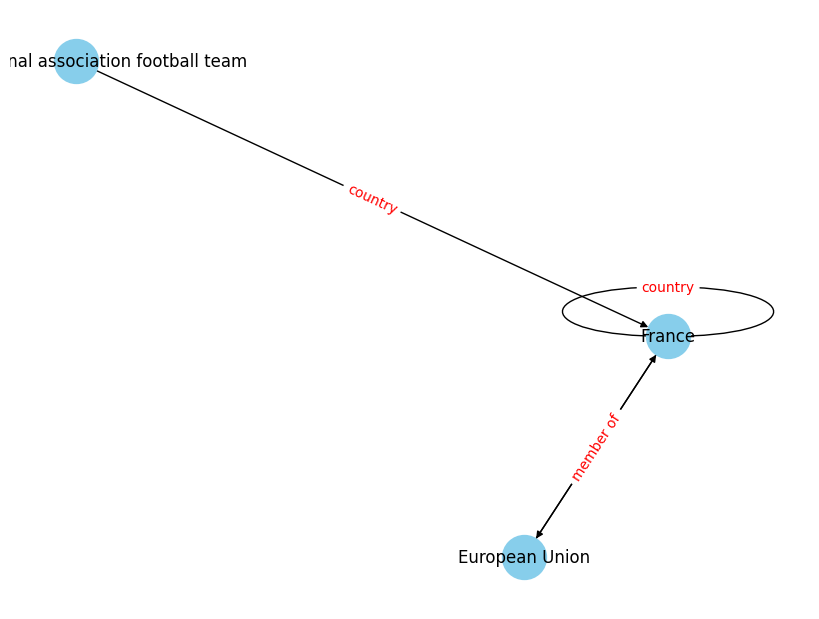

In [ ]:
make_graph(data_test['graph'][14:15])

100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


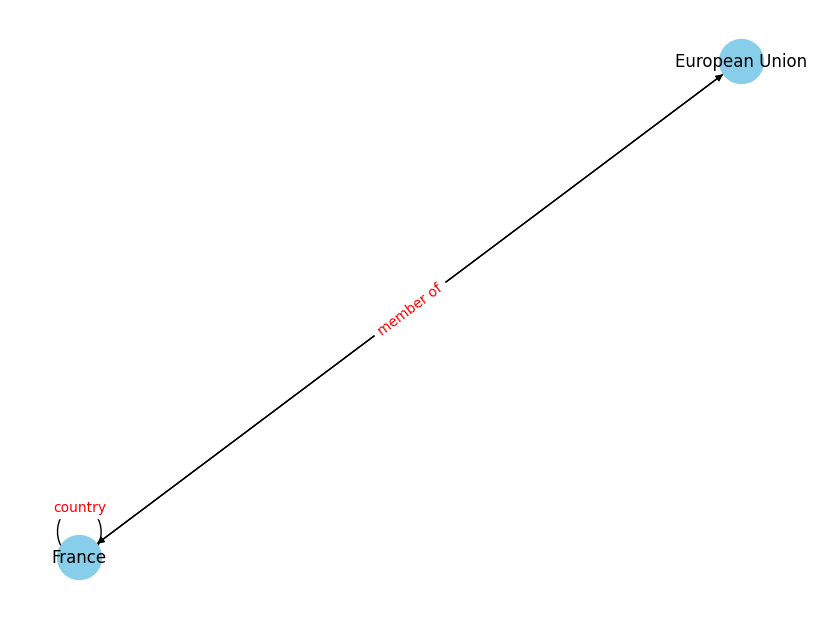

In [ ]:
make_graph(data_test['graph'][13:14])

100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


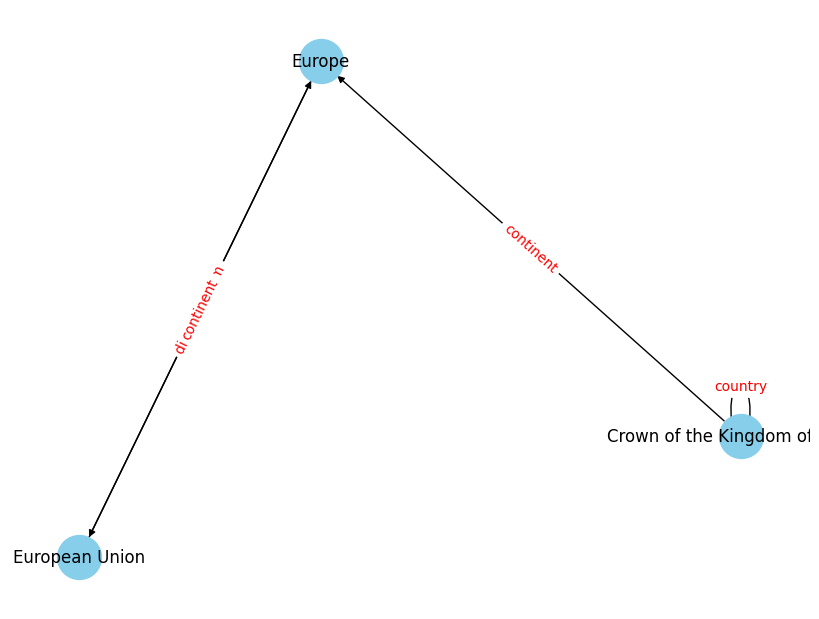

In [ ]:
make_graph(data_test['graph'][12:13])

100%|██████████| 1/1 [00:00<00:00, 16.53it/s]


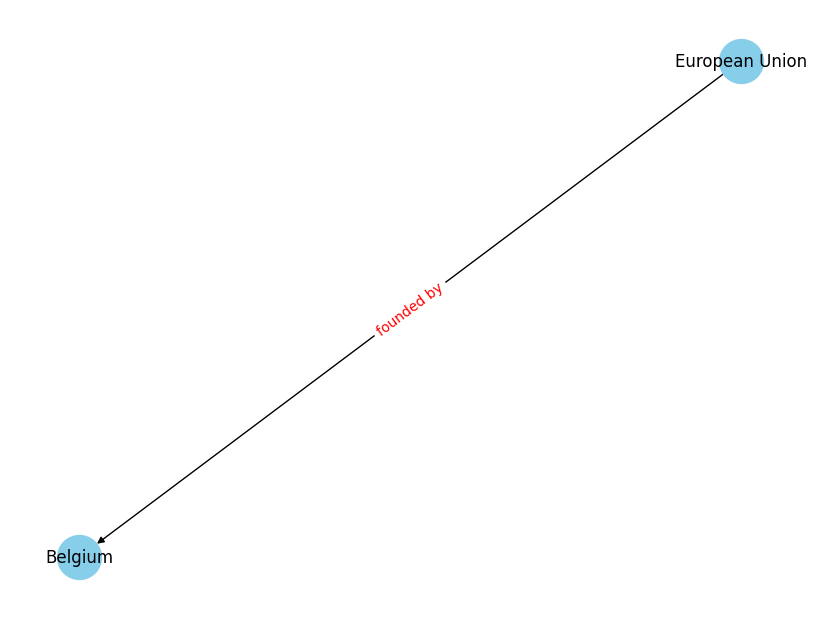

In [ ]:
make_graph(data_test['graph'][11:12])

100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


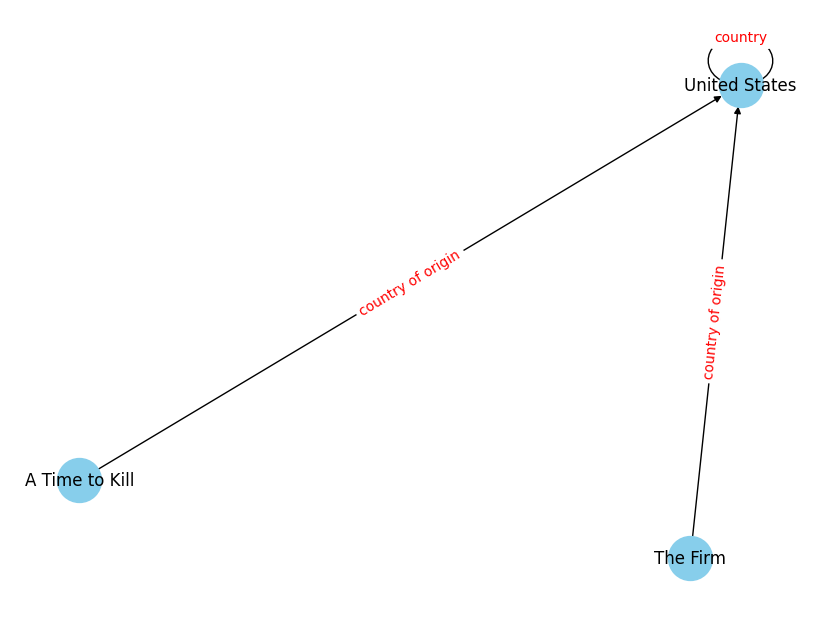

In [ ]:
make_graph(data_test['graph'][9:10])

100%|██████████| 1/1 [00:00<00:00,  9.56it/s]


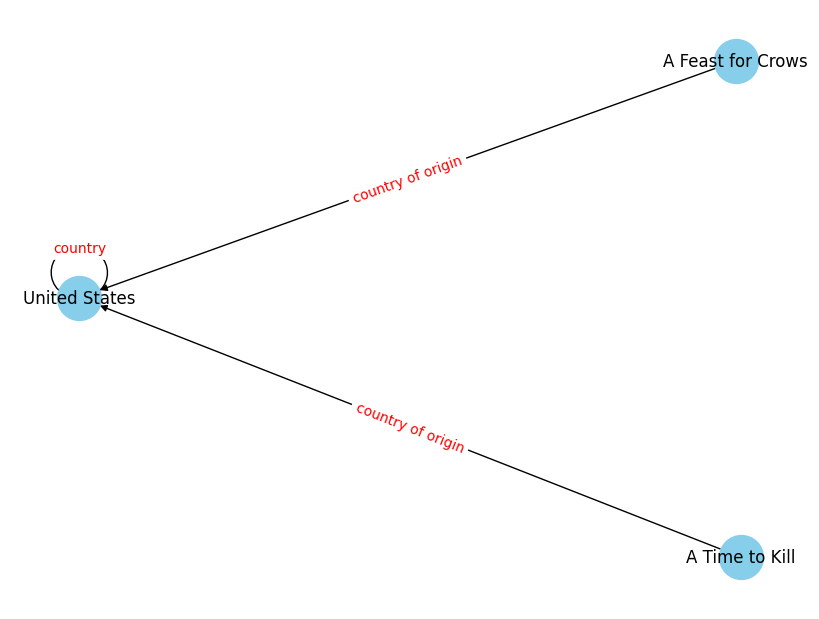

In [ ]:
make_graph(data_test['graph'][1:2])

100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


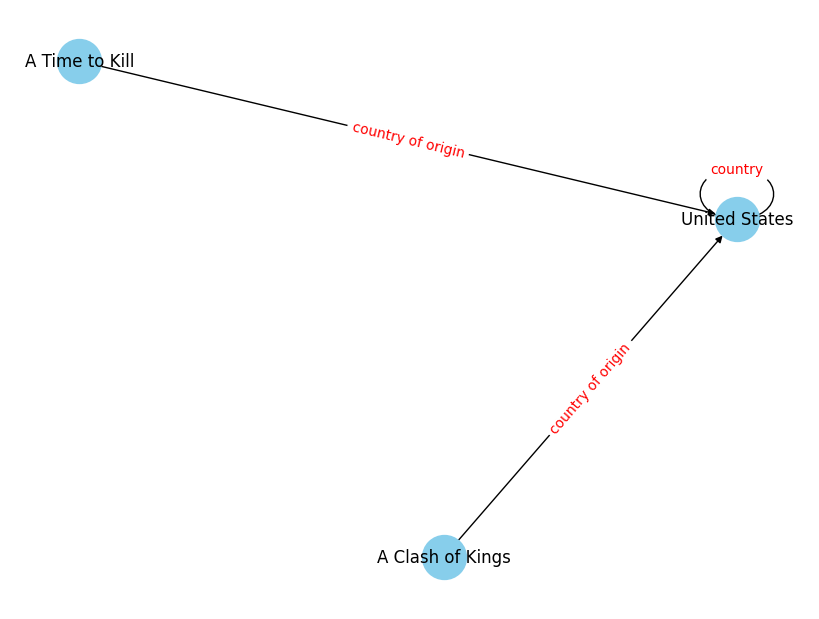

In [ ]:
make_graph(data_test['graph'][:1])

100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


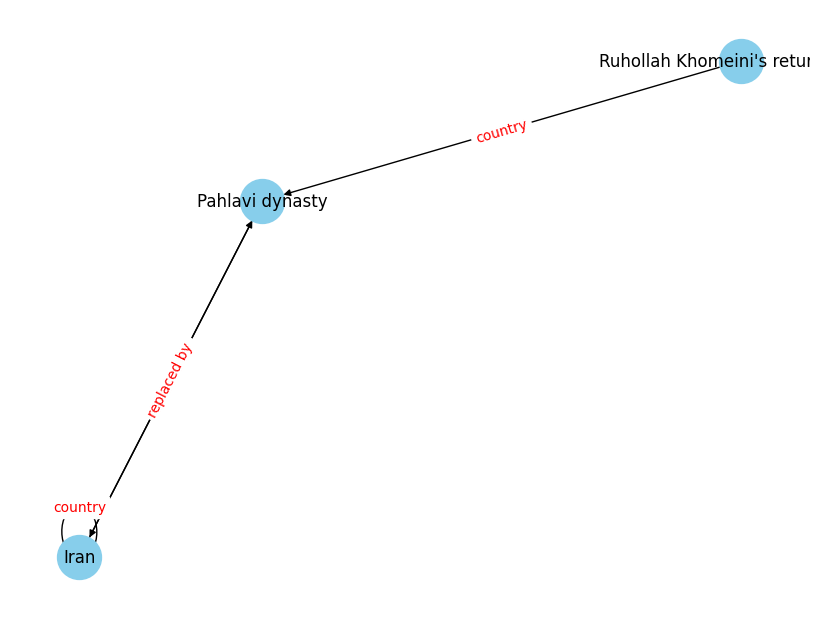

In [ ]:
make_graph(data_train['graph'][:1])

100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


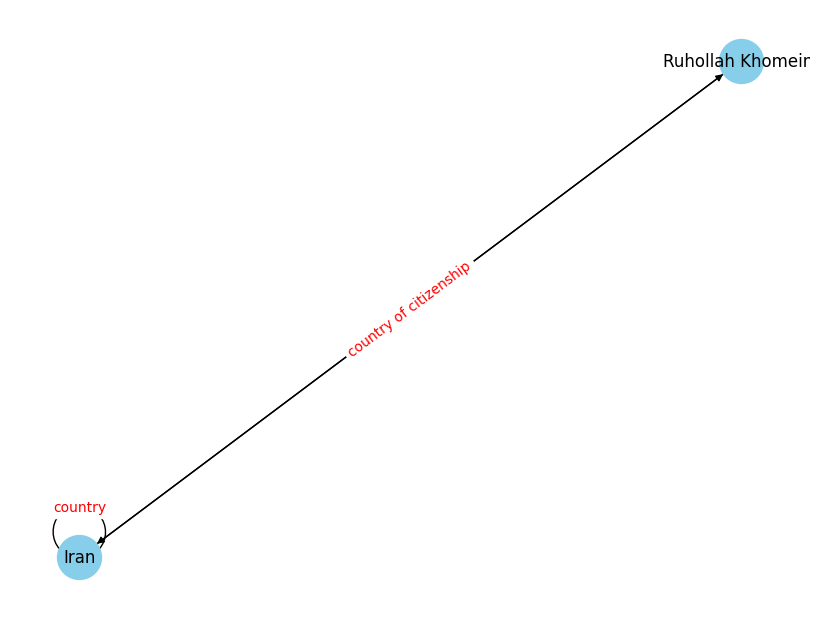

In [ ]:
make_graph(data_train['graph'][2:3])

100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


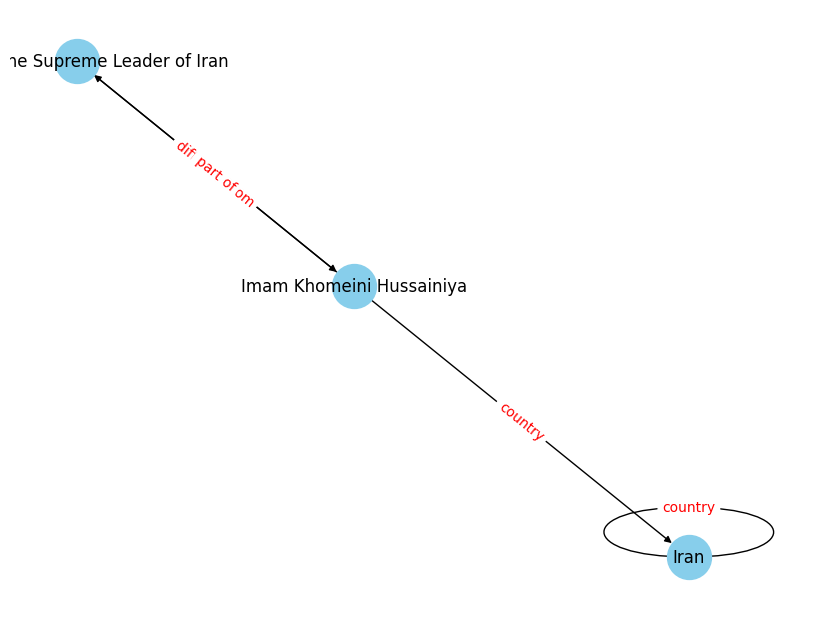

In [ ]:
make_graph(data_train['graph'][3:4])

32.000 nodes - we can't do that :')